# Travel Madness

**Context** 

The UK government amassed traffic data from 2000 and 2016, recording over 1.6 million accidents in the process and making this one of the most comprehensive traffic data sets out there. It's a huge picture of a country undergoing change.

Note that all the contained accident data comes from police reports, so this data does not include minor incidents.

**Content**

ukTrafficAADF.csv tracks how much traffic there was on all major roads in the given time period (2000 through 2016). AADT, the core statistic included in this file, stands for "Average Annual Daily Flow", and is a measure of how activity a road segment based on how many vehicle trips traverse it. The __[AADT page on Wikipedia](https://en.wikipedia.org/wiki/Annual_average_daily_traffic)__ is a good reference on the subject.

Accidents data is split across three CSV files: accidents_2005_to_2007.csv, accidents_2009_to_2011.csv, and accidents_2012_to_2014.csv. These three files together constitute 1.6 million traffic accidents. The total time period is 2005 through 2014, but 2008 is missing.

A data dictionary for the raw dataset at large is available from the UK Department of Transport website __[here](http://data.dft.gov.uk/gb-traffic-matrix/all-traffic-data-metadata.pdf)__. For descriptions of individual columns, see the __[column metadata](https://www.kaggle.com/daveianhickey/2000-16-traffic-flow-england-scotland-wales/data)__.

**Acknowledgements**

The license for this dataset is the Open Givernment Licence used by all data on data.gov.uk (__[here](http://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/)__). The raw datasets are available from the UK Department of Transport website __[here](https://www.dft.gov.uk/traffic-counts/download.php)__.

## Table of Contents

[1. Import Data](#1.-Import-Data) <br>
[2. Exploratory Data Analysis](#2.-Exploratory-Data-Analysis) <br>
[3. Multiple Linear Regression](#3.-Multiple-Linear-Regression)

## 1. Import Data

In [1]:
from IPython.display import *

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Colors
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

We import the traffic datasets into the notebook.

In [3]:
# Import data
traffic_2012_2014 = pd.read_csv('accidents_2012_to_2014.csv', sep = ',')
traffic_2009_2011 = pd.read_csv('accidents_2009_to_2011.csv', sep = ',')
traffic_2005_2007 = pd.read_csv('accidents_2005_to_2007.csv', sep = ',')
AADF = pd.read_csv('ukTrafficAADF.csv', sep = ',')

# Peak
print(color.BOLD + '2005-2009 Dataset:' + color.END)
display(traffic_2005_2007.head())
print('\n')
print(color.BOLD + '2009-2011 Dataset:' + color.END)
display(traffic_2009_2011.head())
print('\n')
print(color.BOLD + '2012-2014 Dataset:' + color.END)
display(traffic_2012_2014.head())
print('\n')
print(color.BOLD + 'UK annual average daily traffic estimates for major roadways, 2000 to 2016:' + color.END)
display(AADF.head())

2005-2009 Dataset:


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005




2009-2011 Dataset:


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200901BS70001,524910,180800,-0.201349,51.512273,1,2,2,1,01/01/2009,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002882,2009
1,200901BS70002,525050,181040,-0.199248,51.514399,1,2,2,11,05/01/2009,...,Zebra crossing,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002886,2009
2,200901BS70003,526490,177990,-0.179599,51.486668,1,3,2,1,04/01/2009,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002912,2009
3,200901BS70004,524800,180300,-0.203110,51.507804,1,2,2,1,05/01/2009,...,Pedestrian phase at traffic signal junction,Daylight: Street light present,Other,Frost/Ice,None,None,1,Yes,E01002871,2009
4,200901BS70005,526930,177490,-0.173445,51.482076,1,2,2,1,06/01/2009,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002840,2009




2012-2014 Dataset:


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19/01/2012,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002821,2012
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01004760,2012
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10/01/2012,...,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002893,2012
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18/01/2012,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002886,2012
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002890,2012




UK annual average daily traffic estimates for major roadways, 2000 to 2016:


,AADFYear,CP,Estimation_method,Estimation_method_detailed,Region,LocalAuthority,Road,RoadCategory,Easting,Northing,...,V2AxleRigidHGV,V3AxleRigidHGV,V4or5AxleRigidHGV,V3or4AxleArticHGV,V5AxleArticHGV,V6orMoreAxleArticHGV,AllHGVs,AllMotorVehicles,Lat,Lon
0,2000,6007,Counted,Manual count,Yorkshire and the Humber,Rotherham,M1,TM,446000,389300,...,5351,656,711,1588,4715,2149,15170,111146,53.398531,-1.309655
1,2000,6009,Counted,Manual count,Yorkshire and the Humber,Leeds,M621,TM,432150,429500,...,1293,272,287,628,1494,921,4895,65939,53.760869,-1.513814
2,2000,6035,Counted,Manual count,Yorkshire and the Humber,Doncaster,M18,TM,466400,407900,...,1952,257,239,745,3695,2000,8888,40229,53.563523,-0.998970
3,2000,6054,Counted,Manual count,Yorkshire and the Humber,Calderdale,M62,TM,404000,416600,...,3121,508,354,1786,5902,3438,15109,85759,53.645893,-1.940967
4,2000,6055,Counted,Manual count,Yorkshire and the Humber,Leeds,M62,TM,426000,426200,...,4030,624,423,1947,6669,3743,17436,98487,53.731551,-1.607374


We merge the 3 datasets along the columns.

In [4]:
# Merge 3 datasets
frames = [traffic_2005_2007, traffic_2009_2011, traffic_2012_2014]
traffic = pd.concat(frames)
# Peak
print(color.BOLD + 'Full traffic dataset:' + color.END)
display(traffic.head())

Full traffic dataset:


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


We fix certain categorical columns (that have been converted to int64).

In [5]:
# Police force
for i in ['Police_Force', 'Accident_Severity', 'Day_of_Week', 'Local_Authority_(District)',
         '1st_Road_Class','Junction_Detail','2nd_Road_Class','Urban_or_Rural_Area']:
    traffic[i] = traffic[i].astype('category')
    traffic_2012_2014[i] = traffic_2012_2014[i].astype('category')
    traffic_2009_2011[i] = traffic_2009_2011[i].astype('category')
    traffic_2005_2007[i] = traffic_2005_2007[i].astype('category')

## 2. Exploratory Data Analysis

Dimensions of the datasets:

* Traffic data:

In [6]:
print('Number of rows: {}'.format(traffic.shape[0]))
print('Number of columns: {}'.format(traffic.shape[1]))

Number of rows: 1504150
Number of columns: 33


* AADF data:

In [7]:
print('Number of rows: {}'.format(AADF.shape[0]))
print('Number of columns: {}'.format(AADF.shape[1]))

Number of rows: 275385
Number of columns: 29


Variable Dtypes:

* Traffic data:

In [8]:
traffic.dtypes

Accident_Index                                   object
Location_Easting_OSGR                           float64
Location_Northing_OSGR                          float64
Longitude                                       float64
Latitude                                        float64
Police_Force                                   category
Accident_Severity                              category
Number_of_Vehicles                                int64
Number_of_Casualties                              int64
Date                                             object
Day_of_Week                                    category
Time                                             object
Local_Authority_(District)                     category
Local_Authority_(Highway)                        object
1st_Road_Class                                 category
1st_Road_Number                                   int64
Road_Type                                        object
Speed_limit                                     

* AADF data:

In [9]:
AADF.dtypes

AADFYear                        int64
CP                              int64
Estimation_method              object
Estimation_method_detailed     object
Region                         object
LocalAuthority                 object
Road                           object
RoadCategory                   object
Easting                         int64
Northing                        int64
StartJunction                  object
EndJunction                    object
LinkLength_km                 float64
LinkLength_miles              float64
PedalCycles                     int64
Motorcycles                     int64
CarsTaxis                       int64
BusesCoaches                    int64
LightGoodsVehicles              int64
V2AxleRigidHGV                  int64
V3AxleRigidHGV                  int64
V4or5AxleRigidHGV               int64
V3or4AxleArticHGV               int64
V5AxleArticHGV                  int64
V6orMoreAxleArticHGV            int64
AllHGVs                         int64
AllMotorVehi

Descriptive Statistics:

* Traffic data:

In [10]:
traffic.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Number_of_Vehicles,Number_of_Casualties,1st_Road_Number,Speed_limit,2nd_Road_Number,Year
count,1.504049e+06,1.504049e+06,1.504049e+06,1.504049e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06
mean,4.396214e+05,3.001584e+05,-1.436625e+00,5.258940e+01,1.831606e+00,1.350960e+00,1.009919e+03,3.900540e+01,3.815684e+02,2.009370e+03
std,9.511616e+04,1.610084e+05,1.398078e+00,1.449889e+00,7.147586e-01,8.253345e-01,1.823518e+03,1.413993e+01,1.302555e+03,3.013497e+00
min,6.495000e+04,1.029000e+04,-7.516225e+00,4.991294e+01,1.000000e+00,1.000000e+00,-1.000000e+00,1.000000e+01,-1.000000e+00,2.005000e+03
25%,3.750600e+05,1.782600e+05,-2.373902e+00,5.149016e+01,1.000000e+00,1.000000e+00,0.000000e+00,3.000000e+01,0.000000e+00,2.006000e+03
50%,4.399600e+05,2.688300e+05,-1.403714e+00,5.230913e+01,2.000000e+00,1.000000e+00,1.290000e+02,3.000000e+01,0.000000e+00,2.010000e+03
75%,5.230600e+05,3.981510e+05,-2.215100e-01,5.347858e+01,2.000000e+00,1.000000e+00,7.250000e+02,5.000000e+01,0.000000e+00,2.012000e+03
max,6.553700e+05,1.208800e+06,1.759398e+00,6.075754e+01,6.700000e+01,9.300000e+01,9.999000e+03,7.000000e+01,9.999000e+03,2.014000e+03


* AADF data:

In [11]:
AADF.describe()

,AADFYear,CP,Easting,Northing,LinkLength_km,LinkLength_miles,PedalCycles,Motorcycles,CarsTaxis,BusesCoaches,...,V2AxleRigidHGV,V3AxleRigidHGV,V4or5AxleRigidHGV,V3or4AxleArticHGV,V5AxleArticHGV,V6orMoreAxleArticHGV,AllHGVs,AllMotorVehicles,Lat,Lon
count,275385.000000,275385.000000,275385.000000,2.753850e+05,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000,...,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000
mean,2007.967907,47277.490437,425675.250780,3.561826e+05,2.757116,1.712899,123.314654,222.099297,16813.332923,248.662175,...,489.379193,83.551450,88.924513,74.249433,247.927389,271.747354,1255.774163,21152.693542,53.092936,-1.654634
std,4.862875,27004.889605,98687.570954,1.869923e+05,3.815569,2.371086,421.440798,420.874069,16618.266842,374.650774,...,683.713666,121.773472,142.005359,183.767833,752.311296,835.966781,2446.175298,21536.689989,1.681459,1.478250
min,2000.000000,60.000000,69987.000000,7.625000e+04,0.070000,0.040000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.583853,-7.442680
25%,2004.000000,26218.000000,352970.000000,1.921200e+05,0.600000,0.370000,5.000000,58.000000,7125.000000,60.000000,...,148.000000,24.000000,15.000000,7.000000,9.000000,10.000000,252.000000,8941.000000,51.614977,-2.711540
50%,2008.000000,47252.000000,430000.000000,3.240000e+05,1.400000,0.870000,26.000000,113.000000,12255.000000,127.000000,...,273.000000,46.000000,41.000000,20.000000,34.000000,37.000000,489.000000,15143.000000,52.807705,-1.549475
75%,2012.000000,74392.000000,510600.000000,4.296000e+05,3.200000,1.990000,83.000000,214.000000,19951.000000,280.000000,...,517.000000,91.000000,100.000000,56.000000,125.000000,137.000000,1041.000000,24660.000000,53.760638,-0.389834
max,2016.000000,99967.000000,655040.000000,1.205400e+06,55.500000,34.490000,18629.000000,9815.000000,207133.000000,11359.000000,...,10942.000000,5968.000000,3684.000000,3949.000000,11034.000000,13758.000000,27095.000000,262842.000000,60.727231,1.754553


We make simple plots of several variables to understand our data better.

* Traffic data:

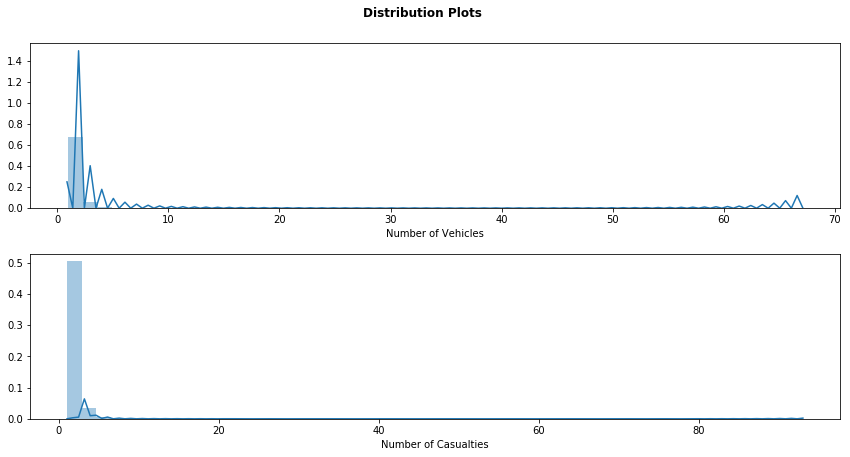

In [12]:
fig, ax = plt.subplots(2,1, figsize = (12,6))
sns.distplot(traffic['Number_of_Vehicles'], ax = ax[0])
sns.distplot(traffic['Number_of_Casualties'], ax = ax[1])
plt.suptitle('Distribution Plots', fontweight = 'bold', y = 1.05)
ax[0].set_xlabel('Number of Vehicles')
ax[1].set_xlabel('Number of Casualties')
plt.tight_layout()

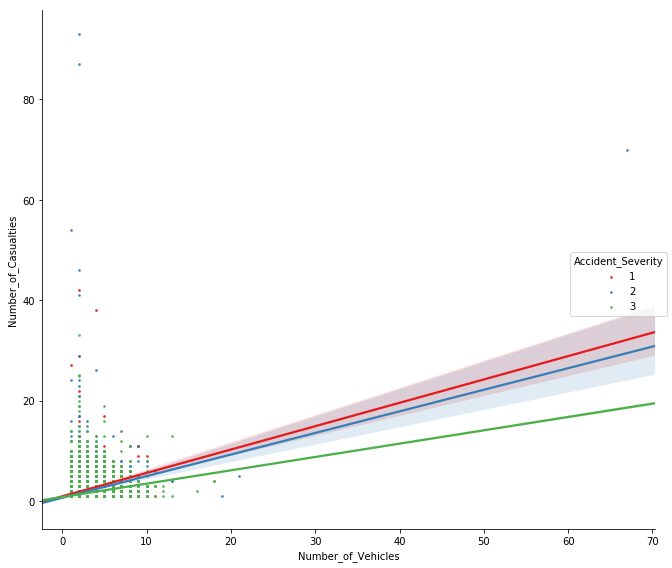

In [13]:
ax = sns.lmplot(x = 'Number_of_Vehicles', y = 'Number_of_Casualties', data = traffic_2012_2014,
                y_jitter = .03, scatter_kws={"s": 3}, hue = "Accident_Severity", size = 8, palette = 'Set1',
                fit_reg = True)
plt.tight_layout()

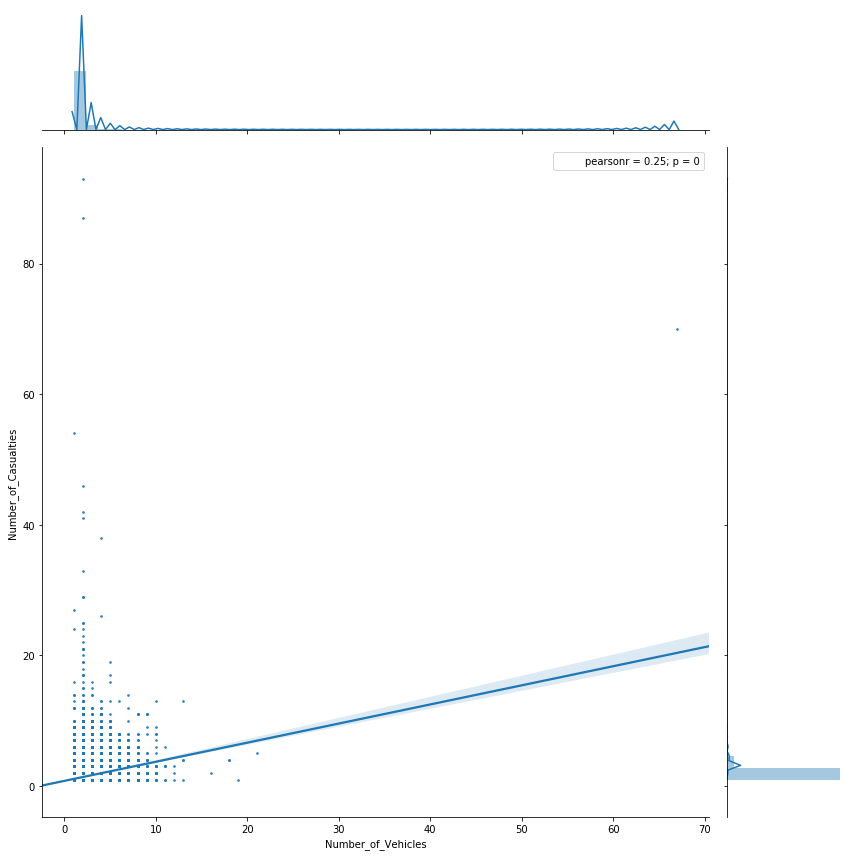

In [14]:
sns.jointplot(x = 'Number_of_Vehicles', y = 'Number_of_Casualties', data = traffic_2012_2014, kind="reg",
              scatter_kws={"s": 3}, size = 12)
plt.tight_layout()

## 3. Multiple Linear Regression

We subset the main traffic data by keeping relevant variables.

In our regression analysis, our predictors will be:

* Police_Force <br>
* Number_of_Vehicles <br>
* Day_of_Week <br>
* Road_Type <br>
* Speed_limit <br>
* Light_Conditions <br>
* Weather_Conditions <br>
* Road_Surface_Conditions <br>
* Special_Conditions_at_Site <br>
* Carriageway_Hazards <br>
* Urban_or_Rural_Area <br>
* Did_Police_Officer_Attend_Scene_of_Accident <br>

Our response is **Number_of_Casualties**.

In [15]:
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [21]:
# Subset of data
columns = ['Number_of_Vehicles', 'Day_of_Week', 'Road_Type', 'Speed_limit',
           'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions',
           'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Urban_or_Rural_Area',
           'Did_Police_Officer_Attend_Scene_of_Accident','Number_of_Casualties']
mlr_traffic = traffic.loc[:,columns].copy()
mlr_traffic.head()

,Number_of_Vehicles,Day_of_Week,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Number_of_Casualties
0,1,3,Single carriageway,30,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,1
1,1,4,Dual carriageway,30,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,1
2,2,5,Single carriageway,30,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,1
3,1,6,Single carriageway,30,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,1
4,1,2,Single carriageway,30,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,1


In [66]:
# Make dummy variables of categorical variables
mlr_traffic_full = pd.get_dummies(mlr_traffic)
mlr_traffic_full.head()

,Number_of_Vehicles,Speed_limit,Number_of_Casualties,Day_of_Week_1,Day_of_Week_2,Day_of_Week_3,Day_of_Week_4,Day_of_Week_5,Day_of_Week_6,Day_of_Week_7,...,Carriageway_Hazards_Dislodged vehicle load in carriageway,Carriageway_Hazards_Involvement with previous accident,Carriageway_Hazards_None,Carriageway_Hazards_Other object in carriageway,Carriageway_Hazards_Pedestrian in carriageway (not injured),Urban_or_Rural_Area_1,Urban_or_Rural_Area_2,Urban_or_Rural_Area_3,Did_Police_Officer_Attend_Scene_of_Accident_No,Did_Police_Officer_Attend_Scene_of_Accident_Yes
0,1,30,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1,1,30,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,2,30,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
3,1,30,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
4,1,30,1,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


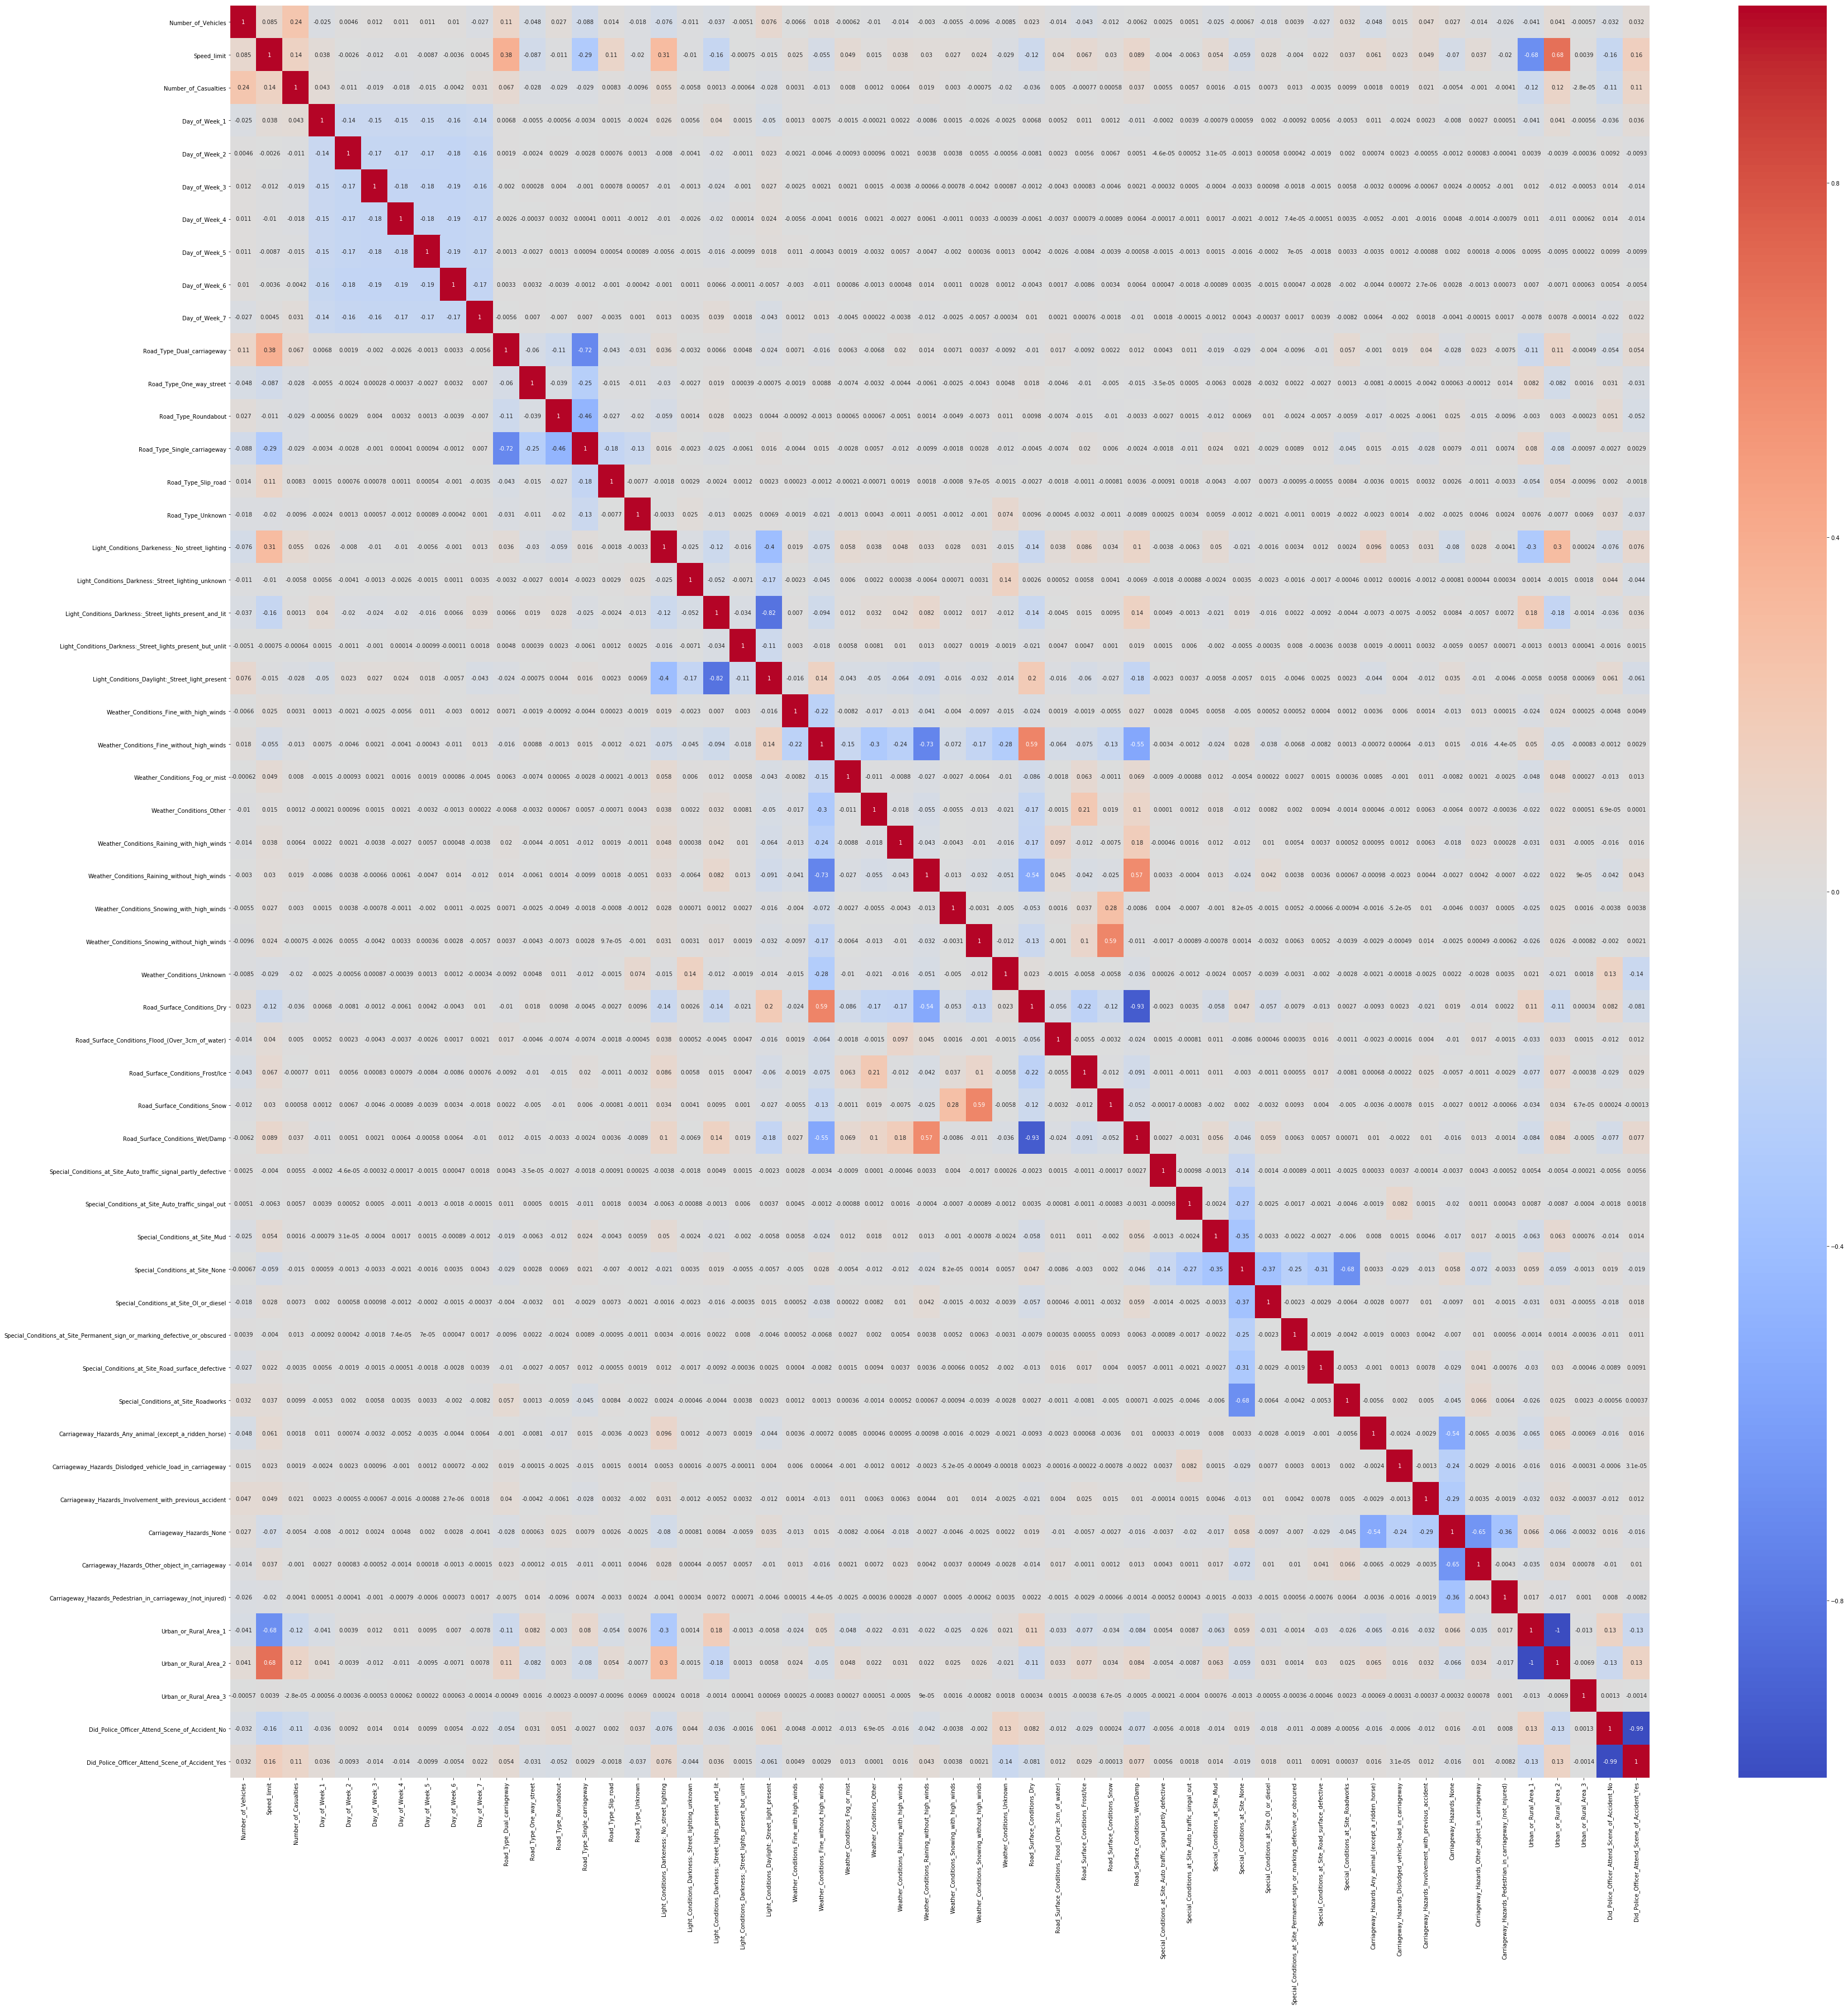

In [65]:
# Correlation heatmap
plt.figure(figsize = (50,50), facecolor='white')
sns.heatmap(mlr_traffic_full.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm')
plt.tight_layout()

In [27]:
regr = skl_lm.LinearRegression()

In [28]:
X = mlr_traffic_full.as_matrix()
y = mlr_traffic['Number_of_Casualties']

In [29]:
regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)

[  3.23920652e-13   7.43849426e-15   1.00000000e+00  -1.55206370e+00
  -1.55206370e+00  -1.55206370e+00  -1.55206370e+00  -1.55206370e+00
  -1.55206370e+00  -1.55206370e+00  -1.44168108e-01  -1.44168108e-01
  -1.44168108e-01  -1.44168108e-01  -1.44168108e-01  -1.44168108e-01
   1.31918654e+00   1.31918654e+00   1.31918654e+00   1.31918654e+00
   1.31918654e+00  -9.11770659e-15  -6.43929354e-15  -6.41153797e-15
  -8.92341756e-15  -6.82787160e-15  -7.82707232e-15  -7.85829735e-15
  -4.80865348e-15  -5.59274849e-15  -2.44249065e-15  -1.85962357e-15
  -1.77635684e-15  -3.58046925e-15  -1.66533454e-15   2.76861867e-15
  -7.18522464e-15  -3.05311332e-16  -5.82867088e-16  -8.04911693e-16
  -2.88311042e-15  -6.93889390e-16  -3.60822483e-15  -2.77555756e-16
   2.33146835e-15  -6.66133815e-16  -7.21644966e-16   8.88178420e-16
  -7.49400542e-16  -3.16163959e-01  -3.16163959e-01  -3.16163959e-01
  -1.83186799e-15  -1.11022302e-15]
0.693209235457


In [71]:
# Using stats model
mlr_traffic_full['Number_of_Casualties'] = mlr_traffic['Number_of_Casualties'].copy()
for i in mlr_traffic_full.columns:
    corrected_label = i.replace(":", "")
    corrected_label = corrected_label.replace("/", "_")
    corrected_label = corrected_label.replace("(", "")
    corrected_label = corrected_label.replace(")", "_")
    corrected_label = '_'.join(i.split(' '))
    corrected_label = corrected_label.replace(":", "")
    corrected_label = corrected_label.replace("/", "_")
    corrected_label = corrected_label.replace("(", "")
    corrected_label = corrected_label.replace(")", "_")
    mlr_traffic_full.rename(columns={i : corrected_label}, inplace=True)

x = ' + '.join(mlr_traffic_full.drop('Number_of_Casualties', axis = 1).columns.tolist())
formula = 'Number_of_Casualties ~ {}'.format(x)
formula

'Number_of_Casualties ~ Number_of_Vehicles + Speed_limit + Day_of_Week_1 + Day_of_Week_2 + Day_of_Week_3 + Day_of_Week_4 + Day_of_Week_5 + Day_of_Week_6 + Day_of_Week_7 + Road_Type_Dual_carriageway + Road_Type_One_way_street + Road_Type_Roundabout + Road_Type_Single_carriageway + Road_Type_Slip_road + Road_Type_Unknown + Light_Conditions_Darkeness_No_street_lighting + Light_Conditions_Darkness_Street_lighting_unknown + Light_Conditions_Darkness_Street_lights_present_and_lit + Light_Conditions_Darkness_Street_lights_present_but_unlit + Light_Conditions_Daylight_Street_light_present + Weather_Conditions_Fine_with_high_winds + Weather_Conditions_Fine_without_high_winds + Weather_Conditions_Fog_or_mist + Weather_Conditions_Other + Weather_Conditions_Raining_with_high_winds + Weather_Conditions_Raining_without_high_winds + Weather_Conditions_Snowing_with_high_winds + Weather_Conditions_Snowing_without_high_winds + Weather_Conditions_Unknown + Road_Surface_Conditions_Dry + Road_Surface_Condi

In [73]:
est = smf.ols(formula, mlr_traffic_full).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Number_of_Casualties   R-squared:                       0.085
Model:                              OLS   Adj. R-squared:                  0.085
Method:                   Least Squares   F-statistic:                     2844.
Date:                  Tue, 27 Mar 2018   Prob (F-statistic):               0.00
Time:                          16:34:46   Log-Likelihood:            -1.7789e+06
No. Observations:               1504150   AIC:                         3.558e+06
Df Residuals:                   1504100   BIC:                         3.559e+06
Df Model:                            49                                         
Covariance Type:              nonrobust                                         
==============================================================================================================================================
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                      0.2909      0.118      2.465      0.014       0.060       0.522
Number_of_Vehicles                                                             0.2695      0.001    293.227      0.000       0.268       0.271
Speed_limit                                                                    0.0042    7.1e-05     59.409      0.000       0.004       0.004
Day_of_Week_1                                                                  0.1313      0.017      7.742      0.000       0.098       0.165
Day_of_Week_2                                                                  0.0162      0.017      0.955      0.340      -0.017       0.049
Day_of_Week_3                                                                  0.0013      0.017      0.078      0.938      -0.032       0.035
Day_of_Week_4                                                                  0.0022      0.017      0.129      0.898      -0.031       0.035
Day_of_Week_5                                                                  0.0065      0.017      0.385      0.700      -0.027       0.040
Day_of_Week_6                                                                  0.0256      0.017      1.514      0.130      -0.008       0.059
Day_of_Week_7                                                                  0.1078      0.017      6.364      0.000       0.075       0.141
Road_Type_Dual_carriageway                                                     0.0787      0.020      3.969      0.000       0.040       0.118
Road_Type_One_way_street                                                       0.0471      0.020      2.342      0.019       0.008       0.087
Road_Type_Roundabout                                                          -0.0205      0.020     -1.032      0.302      -0.059       0.018
Road_Type_Single_carriageway                                                   0.0786      0.020      3.975      0.000       0.040       0.117
Road_Type_Slip_road                                                            0.0347      0.020      1.696      0.090      -0.005       0.075
Road_Type_Unknown                                                              0.0723      0.021      3.439      0.001       0.031       0.114
Light_Conditions_Darkeness_No_street_lighting                                  0.1298      0.024      5.447      0.000       0.083       0.176
Light_Conditions_Darkness_Street_lighting_unknown                              0.0428      0.024      1.768      0.077      -0.005       0.090
Light_Conditions_Darkness_Street_lights_present_and_lit   

## 4. Traffic Volume vs Number of Accidents

533059.445772
0.205312028575


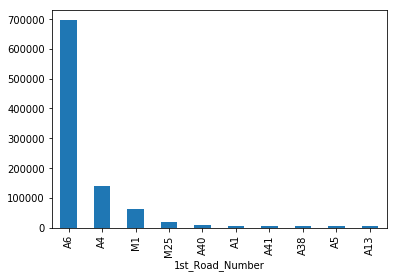

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

fiveseven = pd.read_csv('accidents_2005_to_2007.csv')
nineeleven = pd.read_csv('accidents_2009_to_2011.csv')
twelvefourteen = pd.read_csv('accidents_2012_to_2014.csv')
aadf = pd.read_csv('ukTrafficAADF.csv')



frames = [fiveseven, nineeleven, twelvefourteen]
accidents = pd.concat(frames)

road_types = accidents.groupby('Road_Type')['Accident_Index'].nunique().sort_values(ascending = False)
road_types.plot('bar')

motorway_accidents = accidents[accidents['1st_Road_Class'] == 1]
motorway = motorway_accidents.groupby('1st_Road_Number')['Accident_Index'].nunique().sort_values(ascending = False)
motorway = motorway.rename(lambda x: 'M'+ str(x))

aroad_accidents = accidents[accidents['1st_Road_Class'] == 2]
aroad_accidents2 = accidents[accidents['1st_Road_Class'] == 3]
aroad_accidents = [aroad_accidents, aroad_accidents2]
aroad_accidents = pd.concat(aroad_accidents)
aroad = aroad_accidents.groupby('1st_Road_Number')['Accident_Index'].nunique().sort_values(ascending = False)
aroad = aroad.rename(lambda x: 'A' + str(x))

broad_accidents = accidents[accidents['1st_Road_Class'] == 4]
broad = broad_accidents.groupby('1st_Road_Number')['Accident_Index'].nunique().sort_values(ascending = False)
broad = broad.rename(lambda x: 'B' + str(x))

all_roads0 = [motorway, aroad, broad]
all_roads0 = pd.concat(all_roads0)
all_roads = all_roads0
all_roads = all_roads.sort_values(ascending = False)

top_10_motorway = motorway.head(10)
top_10_motorway.plot('bar')

top_10_aroad = aroad.head(10)
top_10_aroad.plot('bar')

top_10_broad = broad.head(10)
top_10_broad.plot('bar')

top_10_allroad = all_roads.head(10)
top_10_allroad.plot('bar')

columns = ['Road', 'PedalCycles', 'Motorcycles', 'CarsTaxis', 'BusesCoaches', 'LightGoodsVehicles', 'AllHGVs', 'AllMotorVehicles', 'Accidents']
roadframe = pd.DataFrame(columns = columns)
for road in all_roads0.index:
    road_matrix = aadf[aadf['Road'] == road]
    if not road_matrix.empty and not np.isnan(all_roads0[road]):
        pedals = road_matrix['PedalCycles'].mean()
        motor = road_matrix['Motorcycles'].mean()
        cars = road_matrix['CarsTaxis'].mean()
        buses = road_matrix['BusesCoaches'].mean()
        lightgoods = road_matrix['LightGoodsVehicles'].mean()
        heavygoods = road_matrix['AllHGVs'].mean()
        allmotorvehicles = road_matrix['AllMotorVehicles'].mean()
        roadframe = roadframe.append({'Road': road,
                                      'PedalCycles': pedals, 
                                      'Motorcycles': motor, 
                                      'CarsTaxis': cars,
                                      'BusesCoaches': buses,
                                      'LightGoodsVehicles': lightgoods,
                                      'AllHGVs': heavygoods,
                                      'AllMotorVehicles': allmotorvehicles,
                                      'Accidents': float(all_roads0[road])}, ignore_index = True)
correlation = roadframe.corr()    
frame_X = roadframe[['PedalCycles', 'Motorcycles', 'CarsTaxis', 'BusesCoaches', 'LightGoodsVehicles', 'AllHGVs']]
frame_Y = roadframe['Accidents']
msk = np.random.rand(len(frame_X)) < 0.8
train_X = frame_X[msk]
test_X = frame_X[~msk]
train_Y = frame_Y[msk]
test_Y = frame_Y[~msk]

model = linear_model.LinearRegression()
model_fit = model.fit(train_X, train_Y)
pred_Y = model_fit.predict(test_X)
print(mean_squared_error(test_Y, pred_Y))
print(r2_score(test_Y, pred_Y))

## 5. Time Series

C:\Users\toanh\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


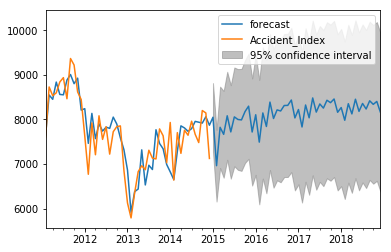

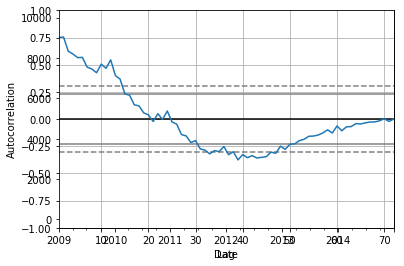

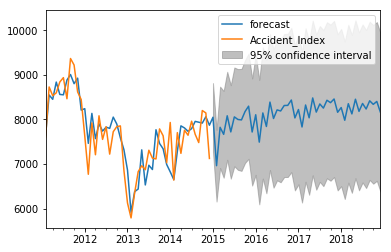

In [75]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

nineeleven = pd.read_csv('accidents_2009_to_2011.csv')
twelvefourteen = pd.read_csv('accidents_2012_to_2014.csv')

small_frames = [nineeleven, twelvefourteen]
small_accidents = pd.concat(small_frames)

small_accidents['Date'] = pd.to_datetime(small_accidents['Date'])
day_accidents = small_accidents.groupby('Date')['Accident_Index'].nunique()

month_accidents2 = day_accidents.groupby(pd.Grouper(freq = 'M')).sum()

day_accidents.plot()
month_accidents2.plot()

pd.plotting.autocorrelation_plot(month_accidents2)


month_accidents2 = month_accidents2.astype(np.float)
res = sm.tsa.ARIMA(month_accidents2, order = (15,0,0)).fit()
#print(res.summary())

#residuals3 = pd.DataFrame(res.resid)
#residuals3.plot()
#plt.show()
#residuals3.plot(kind='kde')
#plt.show()
#print(residuals3.describe())
res.plot_predict(start='02-28-2011', end='12-31-2018')

# 6. Weather Conditions

Weather_Conditions
Fine without high winds       744912
Raining without high winds    110115
Other                          21675
Unknown                        15831
Raining with high winds        12148
Fine with high winds           10520
Snowing without high winds      6822
Fog or mist                     4792
Snowing with high winds         1191
Name: Accident_Index, dtype: int64
Road_Surface_Conditions
Dry                          644351
Wet/Damp                     256014
Frost/Ice                     18614
Snow                           6004
Flood (Over 3cm of water)      1208
Name: Accident_Index, dtype: int64
Light_Conditions
Daylight: Street light present               676110
Darkness: Street lights present and lit      197538
Darkeness: No street lighting                 43143
Darkness: Street lighting unknown              7244
Darkness: Street lights present but unlit      3809
Name: Accident_Index, dtype: int64
Weather_Conditions          Light_Conditions                  

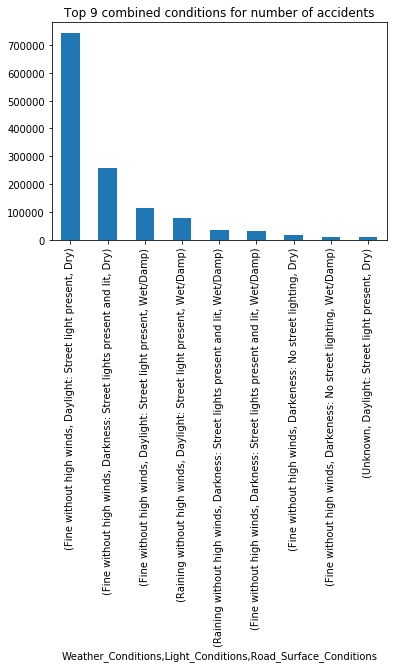

In [76]:
import pandas as pd

fiveseven = pd.read_csv('accidents_2005_to_2007.csv')
nineeleven = pd.read_csv('accidents_2009_to_2011.csv')
twelvefourteen = pd.read_csv('accidents_2012_to_2014.csv')

frames = [fiveseven, nineeleven, twelvefourteen]
accidents = pd.concat(frames)

weather_conditions = accidents.groupby('Weather_Conditions')['Accident_Index'].nunique().sort_values(ascending = False)
surface_conditions = accidents.groupby('Road_Surface_Conditions')['Accident_Index'].nunique().sort_values(ascending = False)
light_conditions = accidents.groupby('Light_Conditions')['Accident_Index'].nunique().sort_values(ascending = False)

weather_light_conditions = accidents.groupby(['Weather_Conditions', 'Light_Conditions'])['Accident_Index'].nunique().sort_values(ascending = False)
top_9_weather_light_conditions = weather_light_conditions.head(9)
weather_surface_conditions = accidents.groupby(['Weather_Conditions', 'Road_Surface_Conditions'])['Accident_Index'].nunique().sort_values(ascending = False)
top_9_weather_surface_conditions = weather_surface_conditions.head(9)
surface_light_conditions = accidents.groupby(['Road_Surface_Conditions', 'Light_Conditions'])['Accident_Index'].nunique().sort_values(ascending = False)
top_9_surface_light_conditions = surface_light_conditions.head(9)

all_conditions = accidents.groupby(['Weather_Conditions', 'Light_Conditions', 'Road_Surface_Conditions'])['Accident_Index'].nunique().sort_values(ascending = False)
top_9_all_conditions = all_conditions.head(9)

print(weather_conditions)
print(surface_conditions)
print(light_conditions)

print(weather_light_conditions)
print(weather_surface_conditions)
print(surface_light_conditions)

print(all_conditions)

weather_conditions.plot('bar', title = 'Number of accidents per weather condition')
surface_conditions.plot('bar', title = 'Number of accidents per road surface condition')
light_conditions.plot('bar', title = 'Number of accidents per light condition')

top_9_weather_light_conditions.plot('bar', title = 'Top 9 weather + light conditions for number of accidents')
top_9_weather_surface_conditions.plot('bar', title = 'Top 9 weather + surface conditions for number of accidents')
top_9_surface_light_conditions.plot('bar', title = 'Top 9 surface +light conditions for number of accidents')

top_9_all_conditions.plot('bar', title = 'Top 9 combined conditions for number of accidents')